# Proyecto individual de DA: Gaming

## Objetivo de negocio:
Grupo inversor está dispuesto a invertir en el desarrollo de nuevos productos, para ello, nos solicitar lo siguietne:
* Analizar el mercado de videojuegos.
* Identificar posibles nichos para desarrollar nuevos productos.
* Encontrar los insights y presentarlos.

### Preguntas a considerar y responder

* ¿Qué análisis podemos hacer del mercado actual?
* ¿Qué lineamientos generales deberá tener en cuenta el grupo inversor a la hora de determinar el primer juego de la empresa, para lograr aprovechar al máximo las tendencias del mercado, y así lograr el objetivo planteado?
* ¿Qué diferencias encontramos entre las distintas plataformas?
* ¿Qué relación podemos considerar en cuanto a la población e ingresos per cápita de los países?
* ¿En qué regiones conviene enfocarse?
* ¿Podemos determinar algo con respecto a los rangos etarios u otras características demográficas?
* ¿Podemos estimar las ventas de los juegos actuales o al menos de una categoría? Shooters por ejemplo.

### Dataset a utilizar
| Archivos:
| ------
| Indicadores_del_desarrollo_humano_mundial Banco Mundial Indicadores de desarrollo humano.
| Console_sales Reporte de ventas anuales de consolas. por marca y modelo.
| Juegos en steam. Reporte con estadísticas de uso de juegos en Steam. Incluye recomendaciones  tiempo de uso, etc.
| Video Games Sales Reporte de ventas por Video Juego y Plataforma. Incluye ranking y apertura por mercados (NA, EU, Japón y Global).

## Fases de trabajo
1. Análisis exploratorio de datos para determinar las transformaciones de variables apropiadas, identificar patrones, y conclusiones.
2. Construir KPIs que se integren con el dashboard:
   1.  *Aumentar en un 10% las ventas por sector para el próximo trimestre.*
   2.  *Aumentar en un 10% la plataforma Steam.*
3. Construir un dashboard interactivo, funcional utilizando filtros adecuados.
4. Generar un readme.md que describa el desarrollo del proyecto y sus correspondientes conclusiones.
5. Narrar un storytelling en 10'.

> ## 1. Análisis exploratorio de los datos

#### Procesos a realizar:
1. Búsqueda de valores faltantes
2. Valores atípicos u outliers
3. Análisis univariado y bivariado
4. Registros duplicados
5. Conclusiones

#### 1.1. Importar Librería

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from math import ceil
from scipy.stats import pearsonr

from scipy import stats

%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

#### 1.3. Creación del DataFrame 2_Console_sales

#### 1.4. Creación del DataFrame 3_Juegos_steam

In [2]:
df_3 = pd.read_csv('dataset/3_Juegos_steam.csv')

In [3]:
df_3

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19


In [4]:
df_3.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price'],
      dtype='object')

In [5]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [6]:
df_3 = df_3.dropna()

In [7]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27061 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27061 non-null  int64  
 1   name              27061 non-null  object 
 2   release_date      27061 non-null  object 
 3   english           27061 non-null  int64  
 4   developer         27061 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27061 non-null  object 
 7   required_age      27061 non-null  int64  
 8   categories        27061 non-null  object 
 9   genres            27061 non-null  object 
 10  steamspy_tags     27061 non-null  object 
 11  achievements      27061 non-null  int64  
 12  positive_ratings  27061 non-null  int64  
 13  negative_ratings  27061 non-null  int64  
 14  average_playtime  27061 non-null  int64  
 15  median_playtime   27061 non-null  int64  
 16  owners            27061 non-null  object 
 17

Dado que todos los demas dataframe están en mayuscula al principio, se opta por hacer este dataframe tambien de la misma forma

In [8]:
df_3.columns = df_3.columns.str.replace('_', ' ').str.title().str.replace(' ', '_')
df_3.columns

Index(['Appid', 'Name', 'Release_Date', 'English', 'Developer', 'Publisher',
       'Platforms', 'Required_Age', 'Categories', 'Genres', 'Steamspy_Tags',
       'Achievements', 'Positive_Ratings', 'Negative_Ratings',
       'Average_Playtime', 'Median_Playtime', 'Owners', 'Price'],
      dtype='object')

#### 1.5. Creación del DataFrame 4_Video_games_sales

Se observa que existen columnas con casi la mitad de filas, por lo cual, no se considerarán.
* Critic_Score
* Critic_Count
* User_Count
* User_Score
* Rating
* Developer

#### 1.6. Observaciones

* Los tamaños de los DataFrame son pequeños y probablemente no existan problemas al trabarlos en un tablero de control.
* Se han eliminado algunas columnas por datos faltantes. Pero se resolverá en análisis posteriores si se eliminan más por irrelevancia.
* Se observa que el dataframe df_1_1 tiene una estructura rara. Se resolverá más adelante si se normaliza o se deja como está.
* Se ha observado cambiar los nombres de las columnas del df_3 para que queden todos iguales.

#### 2.1. Análisis de nulos

In [9]:
df_3.isnull().sum()

Appid               0
Name                0
Release_Date        0
English             0
Developer           0
Publisher           0
Platforms           0
Required_Age        0
Categories          0
Genres              0
Steamspy_Tags       0
Achievements        0
Positive_Ratings    0
Negative_Ratings    0
Average_Playtime    0
Median_Playtime     0
Owners              0
Price               0
dtype: int64

#### 2.2. Normalizacion de valores

#### 2.3. Observaciones:
* No se observan nulos.

#### 3. Búsqueda de valores atípicos o outliers

Para ello, se procederá a graficar valores en histogramas y boxplots.

**Consideraciones**: existe la problemática de la línea del tiempo en el dataframe df_1_1.

##### 3.1. Distribución de los valores en columnas numéricas

##### 3.1.2. df_2

Observaciones:
* se observa que los valores negativos en la columna Sales corresponden a valores Out_of_use, y se eliminan por considerarse atípicos y que no aportan a un análisis de inversiones.

Observaciones: se observa que la mediana de Sales es de 7 millones usd. Hasta 15 millones usd parece probable. Son pocos los casos donde se superan los 20 millones usd.

##### 3.1.3. df_3

In [10]:
df_3.head()

,Appid,Name,Release_Date,English,Developer,Publisher,Platforms,Required_Age,Categories,Genres,Steamspy_Tags,Achievements,Positive_Ratings,Negative_Ratings,Average_Playtime,Median_Playtime,Owners,Price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [11]:
df_3.columns

Index(['Appid', 'Name', 'Release_Date', 'English', 'Developer', 'Publisher',
       'Platforms', 'Required_Age', 'Categories', 'Genres', 'Steamspy_Tags',
       'Achievements', 'Positive_Ratings', 'Negative_Ratings',
       'Average_Playtime', 'Median_Playtime', 'Owners', 'Price'],
      dtype='object')

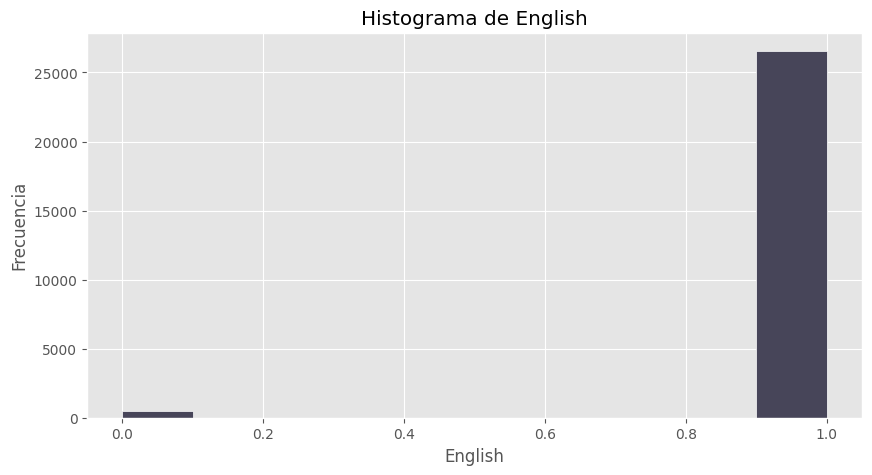

In [12]:
# Crear el histograma solo para 'English'
plt.figure(figsize=(10, 5))
plt.hist(df_3['English'], bins=10, color='#474559', edgecolor='white')
plt.title('Histograma de English')
plt.xlabel('English')
plt.ylabel('Frecuencia')
plt.show()

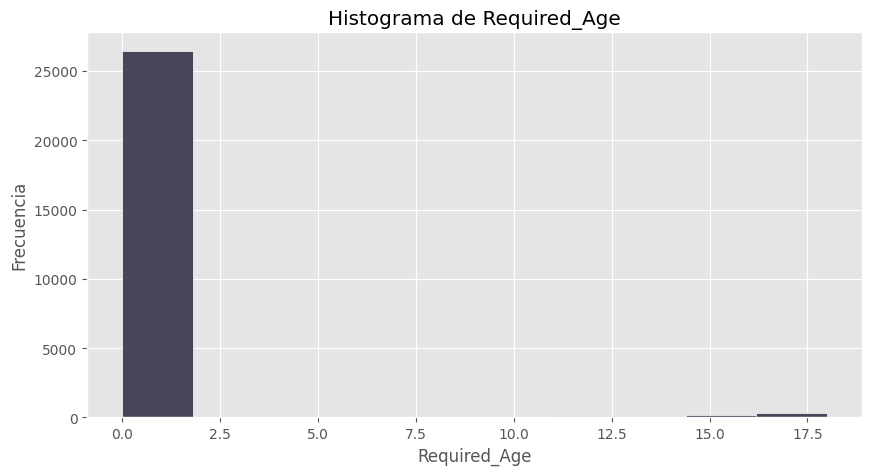

In [13]:
# Crear el histograma solo para 'Required_Age'
plt.figure(figsize=(10, 5))
plt.hist(df_3['Required_Age'], bins=10, color='#474559', edgecolor='white')
plt.title('Histograma de Required_Age')
plt.xlabel('Required_Age')
plt.ylabel('Frecuencia')
plt.show()

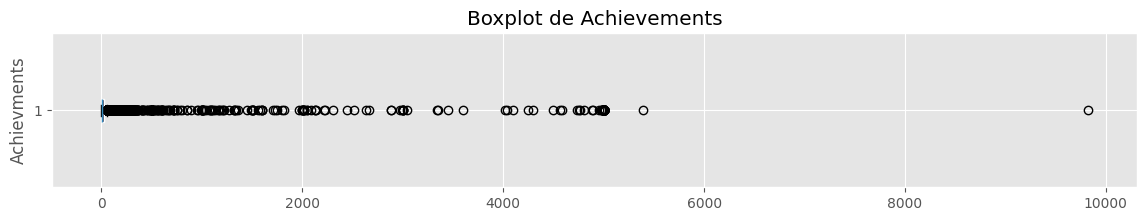

In [14]:
# Crear el boxplot para 'Achievements' en horizontal
plt.figure(figsize=(14, 2))
plt.boxplot(df_3['Achievements'], vert=False, patch_artist=True, boxprops=dict(facecolor='#474559', color='white'))
plt.title('Boxplot de Achievements')
plt.ylabel('Achievments')
plt.show()

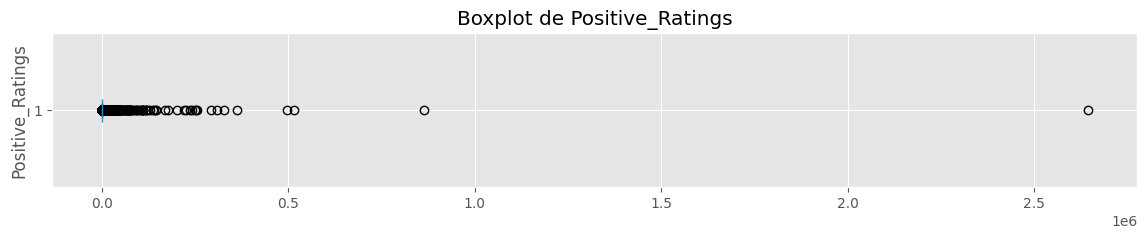

In [15]:
# Crear el boxplot para 'Positive_Ratings' en horizontal
plt.figure(figsize=(14, 2))
plt.boxplot(df_3['Positive_Ratings'], vert=False, patch_artist=True, boxprops=dict(facecolor='#474559', color='white'))
plt.title('Boxplot de Positive_Ratings')
plt.ylabel('Positive_Ratings')
plt.show()

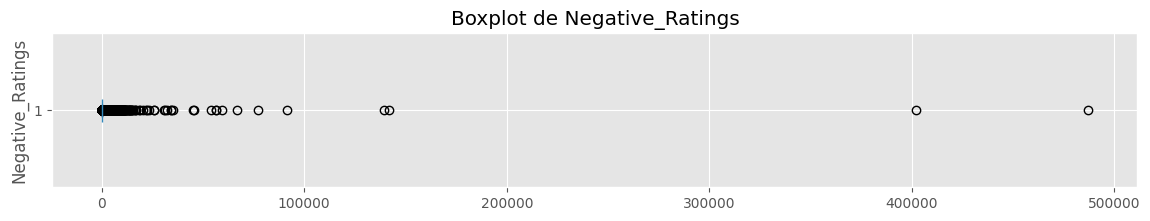

In [16]:
# Crear el boxplot para 'Negative_Ratings' en horizontal
plt.figure(figsize=(14, 2))
plt.boxplot(df_3['Negative_Ratings'], vert=False, patch_artist=True, boxprops=dict(facecolor='#474559', color='white'))
plt.title('Boxplot de Negative_Ratings')
plt.ylabel('Negative_Ratings')
plt.show()

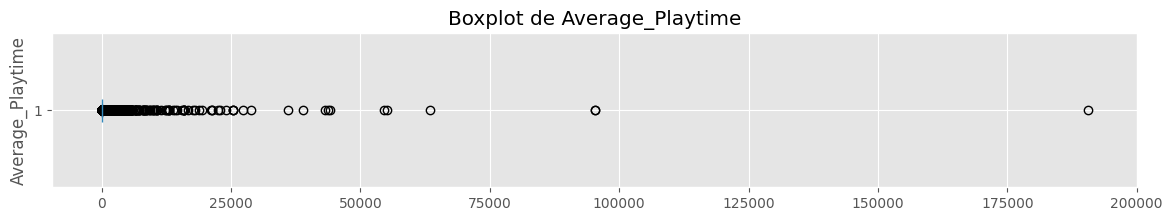

In [17]:
# Crear el boxplot para 'Average_Playtime' en horizontal
plt.figure(figsize=(14, 2))
plt.boxplot(df_3['Average_Playtime'], vert=False, patch_artist=True, boxprops=dict(facecolor='#474559', color='white'))
plt.title('Boxplot de Average_Playtime')
plt.ylabel('Average_Playtime')
plt.show()

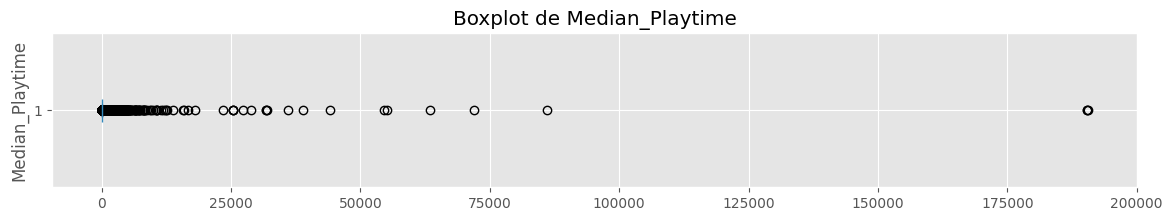

In [18]:
# Crear el boxplot para 'Median_Playtime' en horizontal
plt.figure(figsize=(14, 2))
plt.boxplot(df_3['Median_Playtime'], vert=False, patch_artist=True, boxprops=dict(facecolor='#474559', color='white'))
plt.title('Boxplot de Median_Playtime')
plt.ylabel('Median_Playtime')
plt.show()

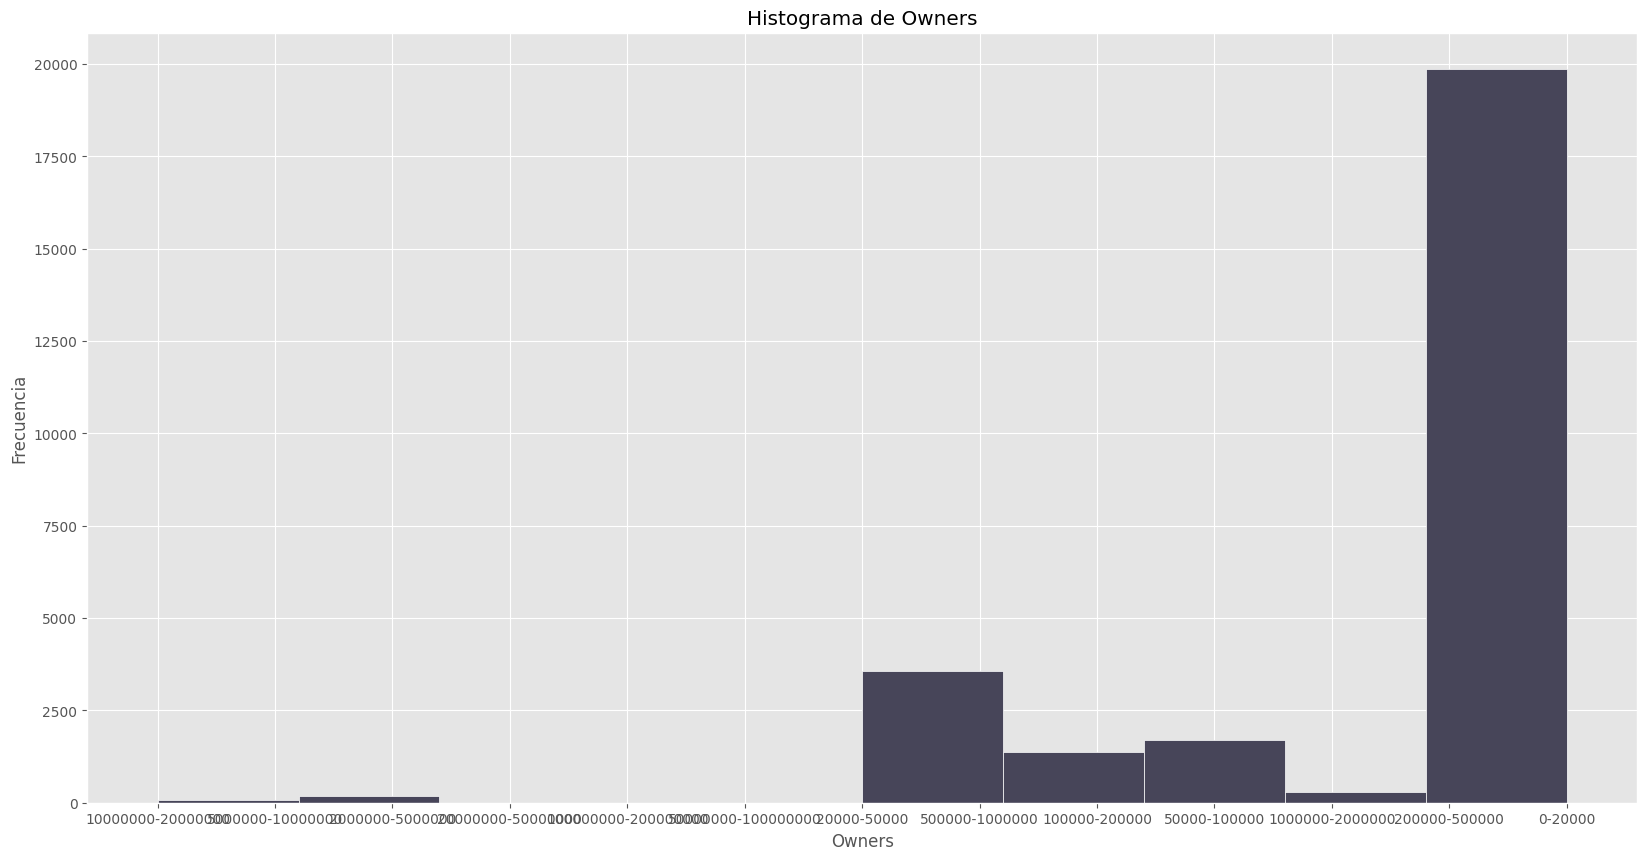

In [19]:
# Crear el histograma solo para 'Owners'
plt.figure(figsize=(20, 10))
plt.hist(df_3['Owners'], bins=10, color='#474559', edgecolor='white')
plt.title('Histograma de Owners')
plt.xlabel('Owners')
plt.ylabel('Frecuencia')
plt.show()

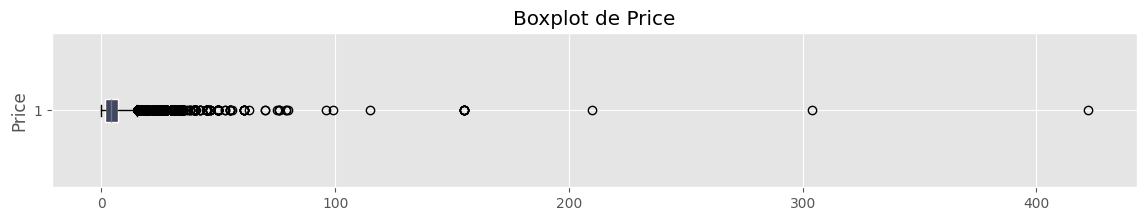

In [20]:
# Crear el boxplot para 'Price' en horizontal
plt.figure(figsize=(14, 2))
plt.boxplot(df_3['Price'], vert=False, patch_artist=True, boxprops=dict(facecolor='#474559', color='white'))
plt.title('Boxplot de Price')
plt.ylabel('Price')
plt.show()

Observaciones:
* Se utilizó boxplot cuando el histograma no aporta información al respecto.
* La columna achievements parece no entregar información y por lo cual se la eliminará.
* Si bien se observan valores outliers en "Price", "Owner", "Median_Platyime", "Average_Playtime", "Positive_Ratings", "Negative_Ratings"; se deben a su distribución sesgada hacia la derecha. Y por el lado de "Required_Age" se observa que la edad general es 0 y po el lado del "English" se observa que practicamente todos los juegos están en inglés.

##### 3.1.4. df_4

Observaciones:
* Se observan valores outliers pero dentro de la distribución desgada.
* Year_of_Release tiene distribucación sesgada hacia la izquierda lo que quiere decir que la producción de juegos ha ido en aumento.
* Las restantes columnas de Sales tienen distribución sesgada hacia la derecha, lo que quiere decir que la mediana de ventas es de valor entre 0 y 1, pero hay muchos valores dispersos, y cuanto más te alejas menos valores encuentras. Es decir, es dificil lograr grandes ventas en un juego.

#### 4. Análisis de tendencia

**Consideraciones**: se seguirá el modelo del análisis de outliers pero analizando por tiempo.

df_2

Observaciones:
* Se ha representado la suma totao de ventas por año.
* Se observa que Nintendo era con diferencia el protagonista en 2008 pero ha caído mucho hasta el 2016, acercándose a Microsoft.
* Tanto Microsoft como Sony se han mantenido prácticamente descendiendo pero de forma mucho menos pronunciada.
* La conclusión desde el 2008 al 2018 es que las ventas por Consola están descendiendo, quizás, por un cambio hacia otros tipos de formas de jugar.

Observaciones:
+ Se observa que prácticamente todas las consolas tienen su período de bonanza entre 3 y 5 años y luego comienza el retroceso de ventas y hay que sacar otra consola al mercado.
+ Se observa que solo Nintendo Switch, Sony PS4 y Xbox One pero esto sucedió durante los últimos 5 años, harbía que ver la evolución.
+ Se observa que solo Nintendo Switch parece incrementar las ventas en la compañia Nintendo, en tanto que Wii y DS fueron consolas con muchas ventas pero decayeron rápidamente a casi 0.
+ Hay consolas con pocas ventas como Nintenod Wii U y  Sony PS Vita.

df_3

In [21]:
df_3

,Appid,Name,Release_Date,English,Developer,Publisher,Platforms,Required_Age,Categories,Genres,Steamspy_Tags,Achievements,Positive_Ratings,Negative_Ratings,Average_Playtime,Median_Playtime,Owners,Price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19


#### 5. Análisis de correlación entre variables

df_2

Observaciones:
* Se ha realizado un encoding para las variables categóricas comparando con Sales, para identificar si existen algunas correlaciones positivas o negativas.
* Se observa que solo Nintendo tiene correlación positiva con las Ventas, igual a 0.16.
* Se observa que existen solo dos grandes destacados, uno de Sony y otro de Nintendo:
  * Nintendo DS, con una correlación positiva de 0.28.
  * Sony PS4 con una correlación positiva de 0.29.
* A la vez también se observa que tanto Nintendo como Sony tienen correlaciones muy negativas:
  * Ninentndo WII U tiene una correlación negativa de -0.25.
  * Sony PS Vita tiene una correlación negativa de -0.31.
* Microdot tiene correlaciones prácticamente neutras y solo 2 modelos.
* Un posterior análisis de cuanto representan estos entre el total sería muy interesante, para identificar la incidencia de cada uno.

df_3

In [22]:
df_3.columns

Index(['Appid', 'Name', 'Release_Date', 'English', 'Developer', 'Publisher',
       'Platforms', 'Required_Age', 'Categories', 'Genres', 'Steamspy_Tags',
       'Achievements', 'Positive_Ratings', 'Negative_Ratings',
       'Average_Playtime', 'Median_Playtime', 'Owners', 'Price'],
      dtype='object')

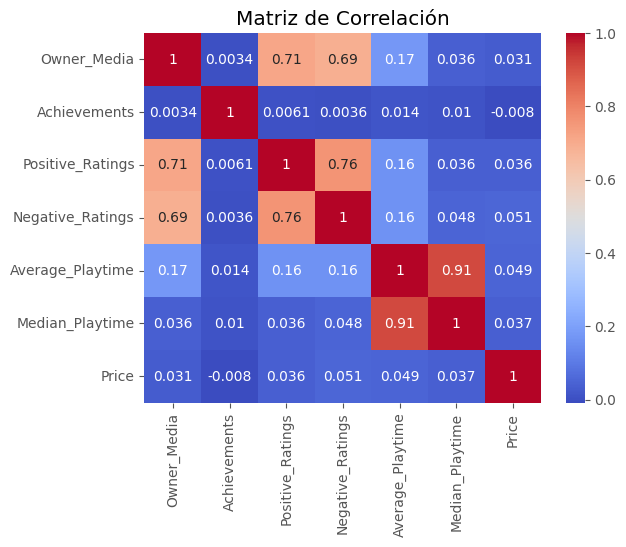

In [23]:
# Función para calcular la media de un rango
def calcular_media(rango):
    valores = list(map(int, rango.split('-')))
    return np.mean(valores)

# Calcular la media para la columna 'Owner'
df_3['Owner_Media'] = df_3['Owners'].apply(calcular_media)

# Calcular la matriz de correlación incluyendo la columna
df_3_corr = df_3[['Owner_Media', 'Achievements', 'Positive_Ratings', 'Negative_Ratings', 'Average_Playtime', 'Median_Playtime', 'Price']].corr()

# Visualizar la matriz de correlación
sns.heatmap(df_3_corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Observaciones:
* No se realiza un análisis con datos categóricos porque son muchos en cada columna y hay que hacer encoding y sería demasiado complejo, y trasciende los límites de este proyecto, debido a la variabilidad de los datos y que muchos son diccionarios.
* Se observa que existe mucha correlación entre la Average_Playtime y Median_Playtime, por lo tanto, se puede hacer una media entre las dos y quitar ambas columnas para eliminar multicolinealidad.

In [24]:
# Calcular el promedio con pesos iguales
df_3['Equal_Weighted_Playtime'] = (df_3['Median_Playtime'] + df_3['Average_Playtime']) / 2

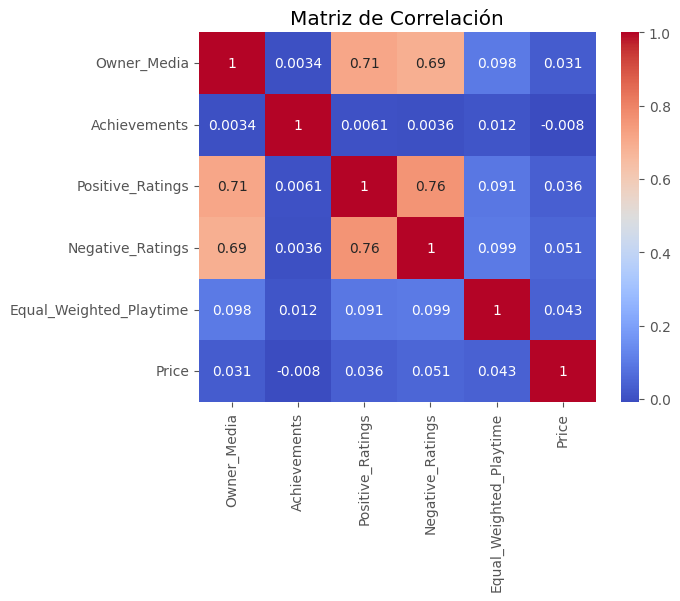

In [25]:
# Calcular la matriz de correlación incluyendo la columna 'Owner_Media'
df_3_corr = df_3[['Owner_Media', 'Achievements', 'Positive_Ratings', 'Negative_Ratings', 'Equal_Weighted_Playtime', 'Price']].corr()

# Visualizar la matriz de correlación
sns.heatmap(df_3_corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Observaciones:
* Se observa ahora que no existe multicolinealidad, no existe prácticamente valores negativos, es decir, aspectos que estén descorrelacionados, pero además la mayoria son cercanos a 0.
* Se nota también que a medida que aumentan el número de Oweners, también aumetnan los Postive_Ratings, y también los Negative_Ratings

Observaciones:
* Se observan correlaciones positivas pero no existe multicolinealidad

#### Análisis de duplicados

In [26]:
# Identificar duplicados

duplicated_rows_3 = df_3.duplicated()


# Mostrar filas duplicadas
print("Filas duplicadas:")

print(df_3[duplicated_rows_3])


# Contar el número de filas duplicadas

num_duplicated_rows_3 = duplicated_rows_3.sum()


print(f"Numero de filas duplicadas: {num_duplicated_rows_3}")


if num_duplicated_rows_3 == 0:
    print('No se encuentran duplicadas en el dataframe df_3')


Filas duplicadas:
Empty DataFrame
Columns: [Appid, Name, Release_Date, English, Developer, Publisher, Platforms, Required_Age, Categories, Genres, Steamspy_Tags, Achievements, Positive_Ratings, Negative_Ratings, Average_Playtime, Median_Playtime, Owners, Price, Owner_Media, Equal_Weighted_Playtime]
Index: []
Numero de filas duplicadas: 0
No se encuentran duplicadas en el dataframe df_3


#### Exportación de los DataFrames

In [27]:

df_3.to_csv('dataset_clean/Juegos.csv', index=False)


#### Conclusiones